In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
import numpy as np
from time import sleep

In [2]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

## Getting familiar with data and its attributes

In [3]:
train_data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
train_data.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [5]:
train_data.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [6]:
test_data.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [3]:
def convert_df2XY(df, frac=1):
    '''
        This method receive an dataframe (df)
        as input and selects a number of random 
        samples from it. The amount of random 
        samples determines with "frac" (percentage).
        e.g. frac=1 means no samplingand frac=0.5
        means that we only need half of the input data.
        Eventually, df is converted into X and Y (data 
        and ground truth).
        
    '''
    df = df.sample(frac=frac, replace=False, random_state=1, axis=0)
    Y = df['satisfaction']
    X = df.drop('satisfaction', 1)
    
    return X, Y

In [4]:
def preprocess_data(input_df, is_test, corr_threshold, fillna_val=None, dropped_attrs=None):
    '''
        This method is in charge of preprocessing
        data and acts differently based on the data
        it is dealing with (train/test). 
        
        is_test: determines that the input_df is
        test data or train data
        
        corr_threshold: sets the threshold that we
        are dropping attributes by that, i.e. first 
        the correlation matrix is computed for the 
        input data and then the correlation between
        each attribute and the "satisfaction" column
        (ground truth) is calculated. If the value of 
        obtained correlation is lower than "corr_threshold",
        that attribute(column) will be dropped. (The reason that
        most applied algorithms don't work well with the threshold
        of zero is that there exist some attributes that obviously
        should be ruled out before feeding the data to the classfier
        as an example the column of id!!!)
        
        fillna_val: is the value used for filling the null
        values of "Arrival Delay in Minutes" attribute (because
        it is the only attribute(column) containing NaN/NULL
        values). If is_test=False, the value if "fillna_val" is 
        not used and the NaN/NULL values are filled with the average
        value of that column. However, if is_test=True, the value of
        "fillna_val" will be used and as its value I used the average
        value obtained during the train time (on train data).
        
        dropped_attrs: is the list of dropped attributes during the
        trainnig. If is_test=False, "dropped_attrs" will be constructed
        and returned in the end. However, if is_test=True, since it is
        crucial to feed the same attributes used for training, in the test time,
        we pass the same list of "dropped_attrs" obtained in the training, while 
        we are evaluating the model.
        
    '''
    df = input_df.copy(deep=False)
    if is_test:
        df['Arrival Delay in Minutes'].fillna(fillna_val, inplace=True)
    else:
        arrival_delay_mean = df['Arrival Delay in Minutes'].mean()
        df['Arrival Delay in Minutes'].fillna(arrival_delay_mean, inplace=True)

    
    
    # Converting categorical attributes to numerical
    df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
    df['Customer Type'] = LabelEncoder().fit_transform(df['Customer Type'])
    df['Type of Travel'] = LabelEncoder().fit_transform(df['Type of Travel'])
    df['Class'] = LabelEncoder().fit_transform(df['Class'])
    df['satisfaction'] = LabelEncoder().fit_transform(df['satisfaction'])
    
    
    if not is_test:
        dropped_attrs = []
        correlation_matrix =  df.corr()
        for attr in list(df):
            if abs(correlation_matrix[attr]['satisfaction']) < corr_threshold:
                dropped_attrs.append(attr)
                df.drop(attr, 1, inplace=True)
    else:
        for attr in dropped_attrs:
            df.drop(attr, 1, inplace=True)
    
    if is_test:
        return df
    
    return df, arrival_delay_mean, dropped_attrs

In [5]:
def train_and_evaluate(classifier, thresholds, train_data, test_data, frac=1):
    '''
        This method is in charge of training (fitting)
        and also evaluating the input classifier
    '''
    accuracies = []

    for threshold in thresholds:
        train_df, arrival_delay_mean, dropped_attrs = preprocess_data(train_data, is_test=False, corr_threshold=threshold)
        X_train, Y_train = convert_df2XY(train_df, frac)
        
        classifier.fit(X_train, Y_train)
        
        test_df = preprocess_data(test_data, is_test=True, corr_threshold=None,fillna_val=arrival_delay_mean, dropped_attrs=dropped_attrs)
        X_test, Y_test = convert_df2XY(test_df)
        acc = classifier.score(X_test, Y_test)
        print(f'Working with threshold of {threshold:.2f}, accuracy: {acc:.3f}')
        accuracies.append(acc) 
        
    return accuracies

In [6]:
thresholds = np.linspace(start=0, stop=0.45, num=4)

## Perceptron

In [11]:
perceptron = Perceptron(
    random_state=0, 
    n_iter_no_change=15
)

perceptron_accuracies = train_and_evaluate(perceptron, thresholds, train_data, test_data)

Working with threshold of 0.00, accuracy: 0.460
Working with threshold of 0.15, accuracy: 0.802
Working with threshold of 0.30, accuracy: 0.752
Working with threshold of 0.45, accuracy: 0.711


## SVM
It is worth mentioining that due to expensive computation SVM(...) demand, I had to use a fraction of the total data (10% for the linear kernel and 20% for the other kernels). Hence, the reported results are obtained by fitting the SVM classifier with only a portion of training data. However, the accuracies are reported by evalutaing the models on the whole test data.

I also want to mention that, at first I misunderstood what this project wanted us. That is why I tried SVM with different kernels instead of combining the perceptron algorithm with the kernel trick. However, as it took me a long time and also caontains valuable result I decided to keep the results assocciated with the SVM and kernel trick.

In [12]:
kernels = ['poly', 'rbf', 'sigmoid', 'linear']

In the following cell, multiple arguments are given to SVC(\*). Please note that according to sklearn documentation only the subset of arguments are being used (based on the chosen kernel) and the other unsed arguments for that specific kernel will be ignored.

In [13]:
svm_accuracies = []
for kernel in kernels:
    svm = SVC(
        C=5000,
        random_state=10,
        kernel=kernel,
        gamma='scale',
        degree=4,
        coef0=0.01,
        max_iter=5000000,
        decision_function_shape = 'ovr' # one vs rest(all)
    )
    print(kernel)
    print()
    
    if kernel == 'linear':
        frac = 0.1
    else:
        frac = 0.2
    svm_accuracies.append(train_and_evaluate(svm, thresholds, train_data, test_data, frac=frac))

poly



/Users/behzad/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Working with threshold of 0.00, accuracy: 0.639


/Users/behzad/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Working with threshold of 0.15, accuracy: 0.473


/Users/behzad/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Working with threshold of 0.30, accuracy: 0.703


/Users/behzad/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Working with threshold of 0.45, accuracy: 0.289
rbf



/Users/behzad/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Working with threshold of 0.00, accuracy: 0.654
Working with threshold of 0.15, accuracy: 0.871


/Users/behzad/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Working with threshold of 0.30, accuracy: 0.902
Working with threshold of 0.45, accuracy: 0.788
sigmoid

Working with threshold of 0.00, accuracy: 0.527
Working with threshold of 0.15, accuracy: 0.620
Working with threshold of 0.30, accuracy: 0.289
Working with threshold of 0.45, accuracy: 0.357
linear



/Users/behzad/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Working with threshold of 0.00, accuracy: 0.632


/Users/behzad/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Working with threshold of 0.15, accuracy: 0.398


/Users/behzad/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Working with threshold of 0.30, accuracy: 0.542


/Users/behzad/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Working with threshold of 0.45, accuracy: 0.561


## Results 
#### (Basic perceptron algorithm / SVM with kernel trick)

In [14]:
accuracies = [perceptron_accuracies, *svm_accuracies]
labels = ['Perceptron']
for i in range(len(kernels)):
    labels.append(f'SVM ({kernels[i]})')

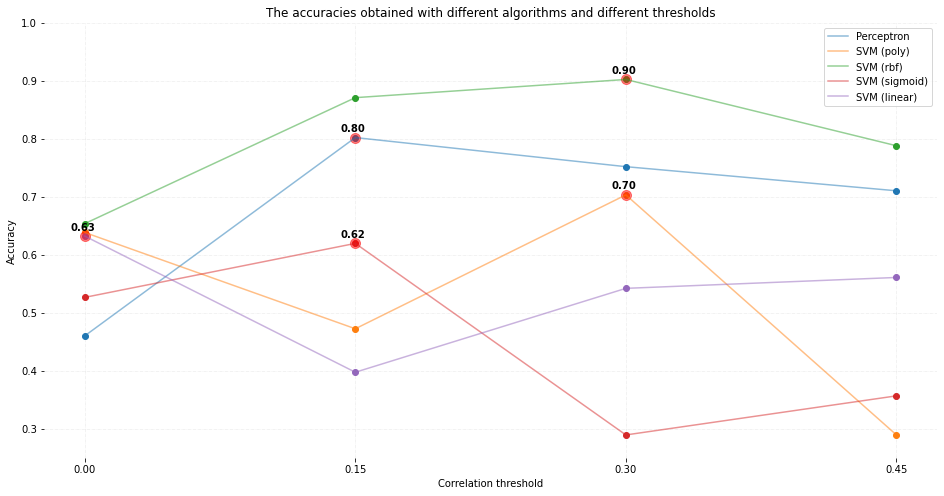

In [16]:
fig, ax = plt.subplots(figsize =(16, 8))

for i in range(len(accuracies)):
    max_indx = np.argmax(accuracies[i])
    
    ax.plot(thresholds, accuracies[i], label=labels[i], alpha=0.5) 
    ax.scatter(thresholds, accuracies[i])
    ax.scatter(thresholds[max_indx], accuracies[i][max_indx], s=100, color='r', alpha=0.5)

    # Show the best accuracy obtained
    # by that algorithm
    plt.text(
        thresholds[max_indx]-0.008, 
        accuracies[i][max_indx] + 0.01,
        f'{accuracies[i][max_indx]:.2f}',
        fontsize = 10, 
        fontweight ='bold',
        color ='black'
    )

ax.set_ylim([0.25,1]) 
ax.set_xticks(thresholds)
ax.grid(
    color ='grey',
    linestyle ='-.',
    linewidth = 0.5,
    alpha = 0.2
)
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.set_title('The accuracies obtained with different algorithms and different thresholds')
ax.set_xlabel('Correlation threshold')
ax.set_ylabel('Accuracy')
ax.legend()

plt.show()

## Perceptron with kernel
Please note that, due to resource limitations, I had to use a fraction of the total data (10% of training data and 10% of test data)

In [206]:
'''
please note that the values set as the default values
for the arguments of following kernel functions, are
the ones that got the best results (accuracy). I looked
for the optimum hyperparamaters in style of "grid search"
'''

def linear_kernel(X, Y):
    return np.dot(X, Y)

def polynomial_kernel(X, Y, coef=1, p=3):
    return (np.dot(X, Y) + coef) ** p

def gaussian_kernel(X, Y, sigma=5.0):
    return np.exp(-np.linalg.norm(X-Y)**2 / (2 * (sigma ** 2)))

def rbf_kernel(X, Y):
    return np.exp(-np.linalg.norm(X - Y) ** 2)

In [223]:
'''
As a suggestion to the inability of the perceptron algorithm 
to classify the non-linear separable data, I replaced the basic
multiplication (weights*features) with kernel trick.

Additionally, to update the value of "bias" without any extra
computation, I always add a feature to the feature of X[i] with 
the value of 1. Thus, the shape of the weights vector will be like:
(#of training features + 1). That is why istead of working with "X[i]",
we work with "np.append(X[i], 1)"
'''
def kernel_perceptron_train(X, Y, kernel, iterations, lr=0.25, verbose=False):
    n_samples, n_features = X.shape
    weights = np.random.randint(-10, 10, X.shape[1]+1) - 0.5 # to become in range of [-0.5,0.5)

    for t in range(iterations):
        if verbose and t % 10 == 0:
            print(f'Iteration {t}/{iterations}')

        for i in range(n_samples):
            k = kernel(np.append(X[i], 1), weights)
            prediction = np.sign(k)
            weights = weights - lr*(prediction-Y[i])*np.append(X[i], 1)
    
    return weights

In [224]:
def kernel_perceptron_predict(X, weights):
    X = np.asarray(X)
    n_samples, n_features = X.shape
    y_predict = np.zeros(X.shape[0])
    
    for i in range(n_samples):
        k = kernel(np.append(X[i], 1), weights)
        prediction = np.sign(k)
        y_predict[i] = prediction

    return y_predict

In [226]:
accuracies = []
for kernel in [linear_kernel, polynomial_kernel, gaussian_kernel, rbf_kernel]:
    for corr_threshold in thresholds:
        train_df, arrival_delay_mean, dropped_attrs = preprocess_data(train_data, is_test=False, corr_threshold=corr_threshold)
        X_train, Y_train = convert_df2XY(train_df, frac=0.1)

        test_df = preprocess_data(test_data, is_test=True, corr_threshold=None,fillna_val=arrival_delay_mean, dropped_attrs=dropped_attrs)
        X_test, Y_test = convert_df2XY(test_df, frac=0.1)

        X_train = X_train.to_numpy()
        Y_train = Y_train.to_numpy()
    
        weights = kernel_perceptron_train(X_train, Y_train, kernel, 20)
        predictions = kernel_perceptron_predict(X_test, weights)
        acc = np.mean(predictions == Y_test)
        accuracies.append(acc)
        print(f'Threshold: {corr_threshold:0.2f}\tAccuracy: {acc:.3f}')
    print()

Threshold: 0.00	Accuracy: 0.419
Threshold: 0.15	Accuracy: 0.000
Threshold: 0.30	Accuracy: 0.424
Threshold: 0.45	Accuracy: 0.420

Threshold: 0.00	Accuracy: 0.431
Threshold: 0.15	Accuracy: 0.000
Threshold: 0.30	Accuracy: 0.429
Threshold: 0.45	Accuracy: 0.420

Threshold: 0.00	Accuracy: 0.569
Threshold: 0.15	Accuracy: 0.569
Threshold: 0.30	Accuracy: 0.813
Threshold: 0.45	Accuracy: 0.784

Threshold: 0.00	Accuracy: 0.569
Threshold: 0.15	Accuracy: 0.569
Threshold: 0.30	Accuracy: 0.569
Threshold: 0.45	Accuracy: 0.784



In [227]:
labels = [
    'perceptron(linear)',
    'perceptron(polynomial)',
    'perceptron(gaussian)',
    'perceptron(rbf)',
]

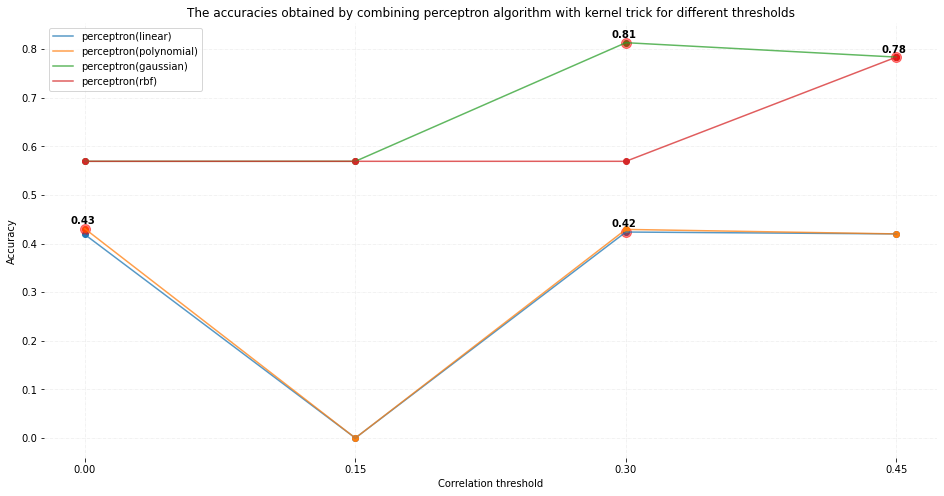

In [229]:
fig, ax = plt.subplots(figsize =(16, 8))

for i in range(0, len(accuracies), 4):
    max_indx = np.argmax(accuracies[i:i+4])
    
    ax.plot(thresholds, accuracies[i:i+4], label=labels[int(i//4)], alpha=0.75) 
    ax.scatter(thresholds, accuracies[i:i+4])
    ax.scatter(thresholds[max_indx], accuracies[i:i+4][max_indx], s=100, color='r', alpha=0.5)

    # Show the best accuracy obtained
    # by that algorithm
    plt.text(
        thresholds[max_indx]-0.008, 
        accuracies[i:i+4][max_indx] + 0.01,
        f'{accuracies[i:i+4][max_indx]:.2f}',
        fontsize = 10, 
        fontweight ='bold',
        color ='black'
    )

ax.set_xticks(thresholds)
ax.grid(
    color ='grey',
    linestyle ='-.',
    linewidth = 0.5,
    alpha = 0.2
)
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.set_title('The accuracies obtained by combining perceptron algorithm with kernel trick for different thresholds')
ax.set_xlabel('Correlation threshold')
ax.set_ylabel('Accuracy')
ax.legend()

plt.show()